### Read Data

In [1]:
import os
import os
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

cwd = os.getcwd()
cwd = cwd.replace('\\Model_Performance&Feature_Engineering', '')
df = pd.read_csv(cwd + '\Dataset\getProcessedData.csv')
df['default'].value_counts().plot(kind = "bar")
plt.show()

<Figure size 640x480 with 1 Axes>

### FEATURE ENGINEERING AND SELECTION

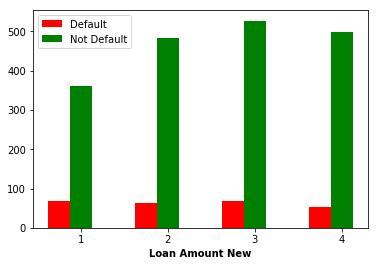

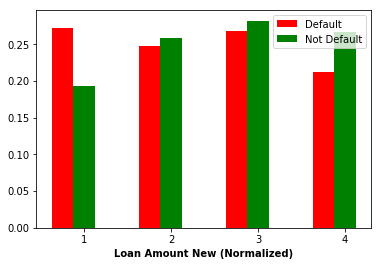

In [2]:
# Loan Amount
def loanAmount(parameter):
    try:     
        if parameter <= 6e6:
            parameter = 1
        elif parameter <= 1.2e7:
            parameter = 2
        elif parameter <= 2.5e7:
            parameter = 3
        else:
            parameter = 4
    except TypeError:
        pass    
    
    return parameter

df['loan_amount_new'] = df['loan_amount'].apply(loanAmount)
tab = pd.crosstab(df['loan_amount_new'],df['default']).sort_values('loan_amount_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['loan_amount_new'], df['default'], normalize='columns').sort_values('loan_amount_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Loan Amount New', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['loan_amount_new']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Loan Amount New (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['loan_amount_new']))
plt.legend()
plt.show()

Binning Info:
- Category 1: Loan amount < 6  million
- Category 2: Loan amount < 12 million
- Category 3: Loan amount < 25 million
- Category 4: Loan amount > 25 million (high-tier)

From the graph above, we know that the amount of loan requested is proportional towards the probability of borrowers defaulting, however, this trend only applies towards mid to low tier loan amount (6 million to 25 million (IDR)). Once it reaches above category 3 (inflection point), this trend reverses.

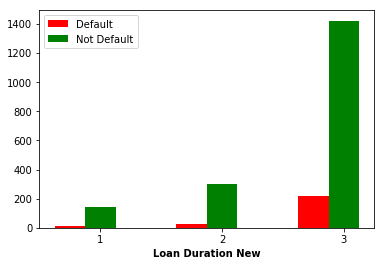

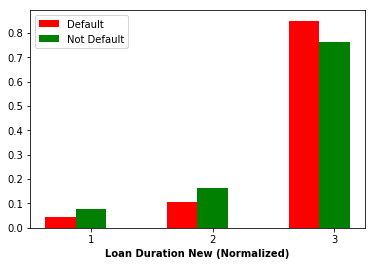

In [3]:
# Loan Duration
def loanDuration(parameter):
    try:
        if parameter < 6:
            parameter = 1      
        elif parameter == 6 :
            parameter = 2
        else:
            parameter = 3
    except TypeError:
        pass    
    
    return parameter

df['loan_duration_new'] = df['loan_duration'].apply(loanDuration)
tab = pd.crosstab(df['loan_duration_new'],df['default']).sort_values('loan_duration_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['loan_duration_new'],df['default'], normalize='columns').sort_values('loan_duration_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Loan Duration New', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['loan_duration_new']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Loan Duration New (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['loan_duration_new']))
plt.legend()
plt.show()

Category Info:
- Category 1 = Loan duration lower than 6 months
- Category 2 = Loan duration of 6 months
- Category 3 = Loan duration larger than 6 months

This graph indicates how longer loan duration can increase the probability of borrowers defaulting. 

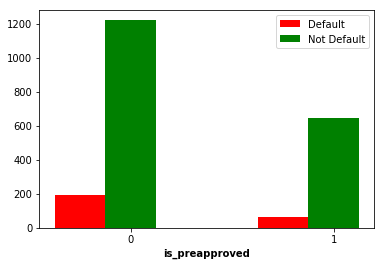

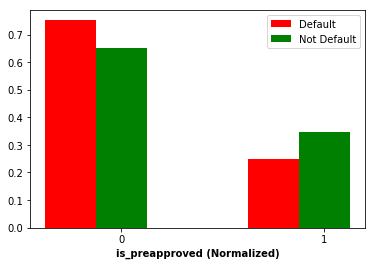

In [4]:
#Categorize The Preapproval Loans
def is_preapproved(param):
    if param != 'Preapproved':
        return 0
    else:
        return 1
    
df['is_preapproved'] = df['program_name'].apply(is_preapproved)
df = df.drop('program_name', axis = 1)
tab = pd.crosstab(df['is_preapproved'],df['default']).sort_values('is_preapproved', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['is_preapproved'],df['default'], normalize='columns').sort_values('is_preapproved', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('is_preapproved', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['is_preapproved']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('is_preapproved (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['is_preapproved']))
plt.legend()
plt.show()

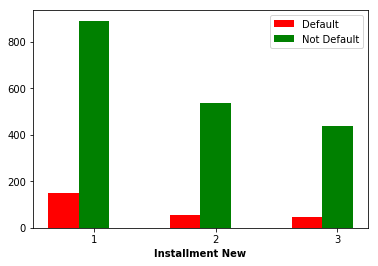

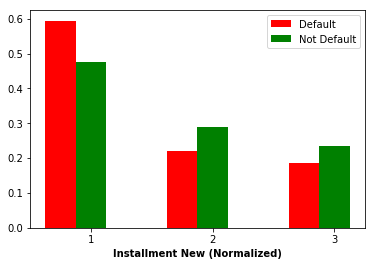

In [5]:
# Installment Size
df['installment'] = df['loan_amount']/df['loan_duration']

def installmentSize(parameter):
    try:
        if parameter <= 1500000:
            parameter = 1
        elif parameter <= 4000000:
            parameter = 2
        else:
            parameter = 3
    except TypeError:
        pass
    return parameter

df['installment_new'] = df['installment'].apply(installmentSize)
tab = pd.crosstab(df['installment_new'],df['default']).sort_values('installment_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['installment_new'],df['default'], normalize='columns').sort_values('installment_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Installment New', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['installment_new']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Installment New (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['installment_new']))
plt.legend()
plt.show()

Category Info:
- Category 1 = Installment size smaller than 1.5 million
- Category 2 = Installment size smaller than 4 million 
- Category 3 = Installment size larger than 4 million

The graph shows that lower installment size per month will result in a higher probability of borrowers defaulting their loans. As installment size increases, the proportion of good loan increases while proportion of default decreases.

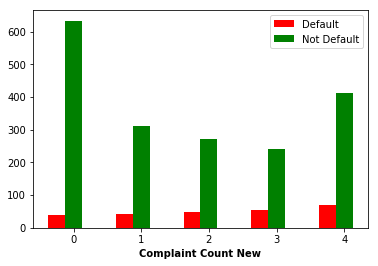

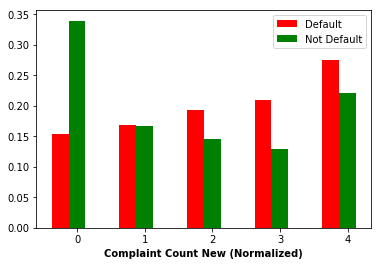

In [6]:
# Complaint Count
def complainCount(parameter):
    try:
        if parameter == 0:
            parameter = 0
        elif parameter <= 5:
            parameter = 1
        elif parameter <= 10:
            parameter = 2
        elif parameter <= 20:
            parameter = 3
        else:
            parameter = 4
    except TypeError:
        pass    
    return parameter

df['complaint_count_new'] = df['complaint_count'].apply(complainCount)
tab = pd.crosstab(df['complaint_count_new'],df['default']).sort_values('complaint_count_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['complaint_count_new'],df['default'], normalize='columns').sort_values('complaint_count_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Complaint Count New', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['complaint_count_new']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Complaint Count New (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['complaint_count_new']))
plt.legend()
plt.show()

Binning Info:
- Category 0 = Complaint count is zero
- Category 1 = Complaint count less than 5 
- Category 2 = Complaint count less than 10
- Category 3 = Complaint count less than 20
- Category 4 = Complaint count more than 20

This graph shows how a higher number of complaint count will increase the probability of a borrower defaulting their loans.
Moreover, a borrower with zero complaints can be considered as safe due to how it has a large proportion of non-defaulters when compared to the defaultees.

Note: Complaint count is taken throughout the history of the store, which can be an inconsistent basis as a store can receive lots of complaints during their early years but has actually become a credible store and borrower. 

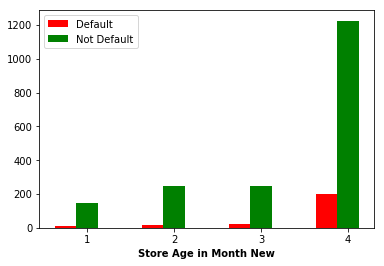

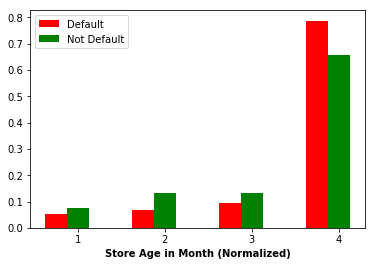

In [7]:
# Store Age months
df['store_age'] = (pd.to_datetime(df['create_time']).dt.date - pd.to_datetime(df['open_since']).dt.date).dt.days
df['store_age_month'] = df['store_age']/30

def storeAge(parameter):
    try:
        if parameter <= 12:
            parameter = 1
        elif parameter <= 24:
            parameter = 2
        elif parameter <= 36:
            parameter = 3
        else:
            parameter = 4
    except TypeError:
        pass    
    return parameter

df['store_age_month_new'] = df['store_age_month'].apply(storeAge)
tab = pd.crosstab(df['store_age_month_new'],df['default']).sort_values('store_age_month_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['store_age_month_new'],df['default'], normalize='columns').sort_values('store_age_month_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Store Age in Month New', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['store_age_month_new']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Store Age in Month (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['store_age_month_new']))
plt.legend()
plt.show()

Category Info:
- Category 1 = Store age in months is less than 12
- Category 2 = Store age in months is less than 24 
- Category 3 = Store age in months is less than 36
- Category 4 = Store age in months is more than 36

The graph above shows how the store age (months) affects the probability of default. A store of more than 3 years old yields more probability of defaulting when compared to a store that is 3 years or younger, which is seen from how it increases from category 1 to 4, and its proportion at category 4 where it experienced a drastic leap.

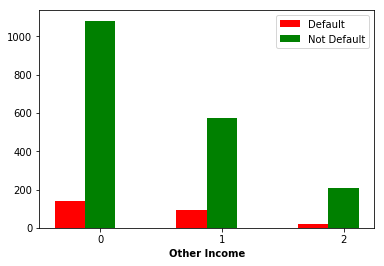

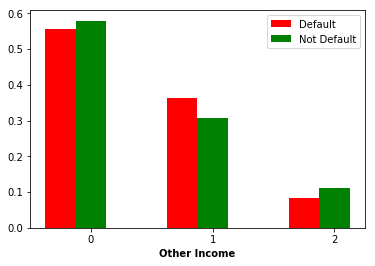

In [8]:
# other monthly income
def income(parameter):
    try:
        if parameter == 0:
            parameter = 0
        elif parameter <= 1.5e7:
            parameter = 1
        else:
            parameter = 2
    except TypeError:
        pass    
    return parameter

df['other_income'] = df['monthly_income'].apply(income)
tabNormed = pd.crosstab(df['other_income'],df['default'],normalize='columns').reset_index()
tab = pd.crosstab(df['other_income'],df['default']).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Other Income', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['other_income']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Other Income', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['other_income']))
plt.legend()
plt.show()

Category Info: 
- Category 0 = If borrower do not have any other source of income (might also indicate no input)
- Category 1 = If borrower has less than 12 million rupiah worth of income
- Category 2 = If borrower has more than 12 million rupiah worth of income

This graph shows that category 1 has the highest probability of defaulting, whereas category 2 indicates how probability of default will decrease if other income source is higher than 12 million rupiah. Category 0 uniquely shows that borrowers of this class have lesser proportion of defaults when compared to the non defaulters.

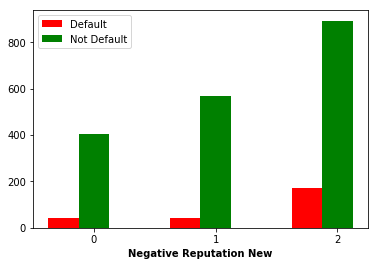

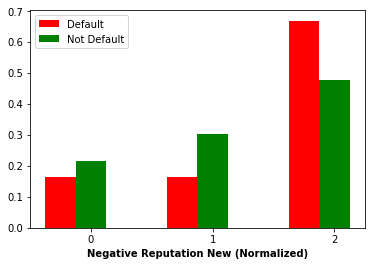

In [9]:
# Negative Reputation Rate

def divide(negative,transaction):
    if (transaction == 0):
        return 0
    else:
        return negative/transaction

def negativeReputation(parameter):
    try:
        if parameter == 0:
            parameter = 0
        elif parameter <= 0.005:
            parameter = 1
        else:
            parameter = 2
    except TypeError:
        pass    
    return parameter

df['reputation_negative'] = df.apply(lambda row: divide(row['negative'], row['total_transaction']), axis = 1)
df['reputation_negative_new'] = df['reputation_negative'].apply(negativeReputation)
tab = pd.crosstab(df['reputation_negative_new'],df['default']).sort_values('reputation_negative_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['reputation_negative_new'],df['default'], normalize='columns').sort_values('reputation_negative_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Negative Reputation New', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['reputation_negative_new']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Negative Reputation New (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['reputation_negative_new']))
plt.legend()
plt.show()

Category Info: 

Note: Negative Reputation is being calculated as the number of negative reputation over its total transaction (rate of negative reputation)

- Category 0 = If borrower have rate of negative reputation of 0
- Category 1 = If borrower have rate of negative reputation of less than 0.005
- Category 2 = If borrower have rate of negative reputation of more than 0.005

The graph indicates that if borrower has more than 5% of number of negative reputation over its whole total transaction will have greater tendency to default their loan (as seen from the spike in category 2)

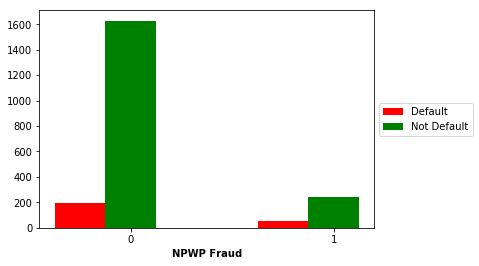

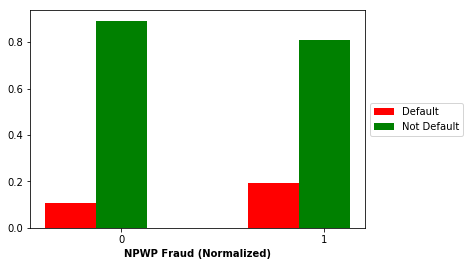

In [10]:
tab = pd.crosstab(df['fraud_npwp'],df['default']).sort_values('fraud_npwp', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['fraud_npwp'],df['default'], normalize='index').sort_values('fraud_npwp', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('NPWP Fraud', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['fraud_npwp']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('NPWP Fraud (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['fraud_npwp']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Category Info:
- 0 represents legit npwp fulfillment
- 1 represent empty or invalid npwp input by borrowers

Filling the npwp in an invalid way (wrong input or empty) signifies a higher tendency of borrowers to default their loans. It can be seen from how proportion of default increases when a person gave a fraud NPWP number whereas proportion of non-defaulters decreases.

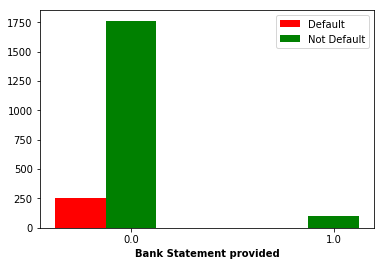

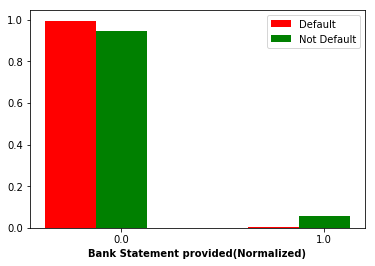

In [11]:
# bank statement exist?
tab = pd.crosstab(df['bank_statement'],df['default']).sort_values('bank_statement', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['bank_statement'],df['default'], normalize='columns').sort_values('bank_statement', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Bank Statement provided', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['bank_statement']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Bank Statement provided(Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['bank_statement']))
plt.legend()
plt.show()

Category Info:
- Category 0: If borrowers do not submit its bank statement
- Category 1: If borrowers do submit their bank statements

The graph above shows that borrowers who provided bank statemetents has more tendency to not default their loans, as seen how its non-defaulters are greater than its defaulters. This statement is further complemented by the fact that category 0 has more defaulters than non-defaulters.

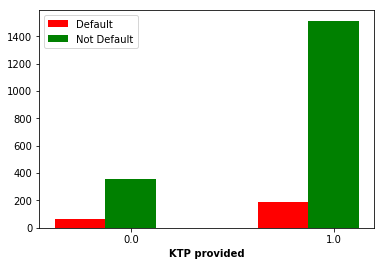

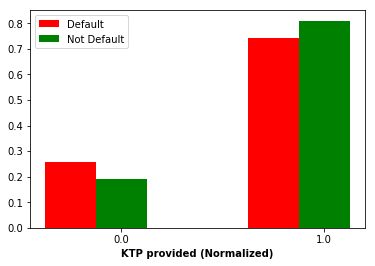

In [12]:
# ktp
tab = pd.crosstab(df['ktp'],df['default']).sort_values('ktp', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['ktp'],df['default'], normalize='columns').sort_values('ktp', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('KTP provided', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['ktp']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('KTP provided (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['ktp']))
plt.legend()
plt.show()

Category Info:
- Category 0: If borrowers do not submit their ktp correctly
- Category 1: If borrowers do submit their ktp correctly

The graph above shows that borrowers who provided bank ktp has more tendency to not default their loans, as seen how its non-defaulters are greater than its defaulters. This statement is further complemented by the fact that category 0 has more defaulters than non-defaulters.

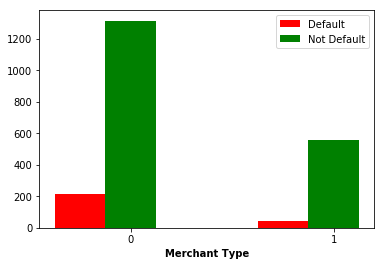

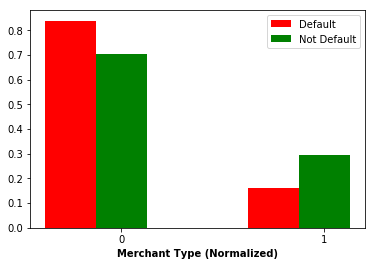

In [13]:
# merchant type
def merchantType(parameter):
    if parameter == 'Gold Merchant':
        parameter = 1
    else:
        parameter = 0
    return parameter
df['merchant_type'] = df['merchant_type'].apply(merchantType)

tab = pd.crosstab(df['merchant_type'],df['default']).sort_values('merchant_type', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['merchant_type'],df['default'], normalize='columns').sort_values('merchant_type', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Merchant Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['merchant_type']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Merchant Type (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['merchant_type']))
plt.legend()
plt.show()

Category Info:
- 0 is regular merchant
- 1 is gold mercant

The graph above shows that gold merchant has a lower tendency of defaulting when compared to the regular merchant. As it has lower number of non-defaulters, as well as having more borrowers that do not default their loans when compared to the default ones.

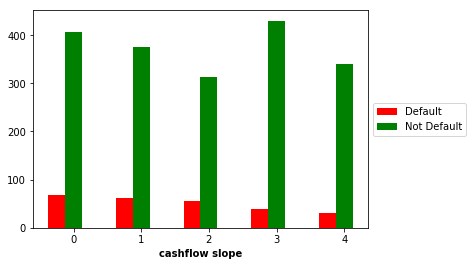

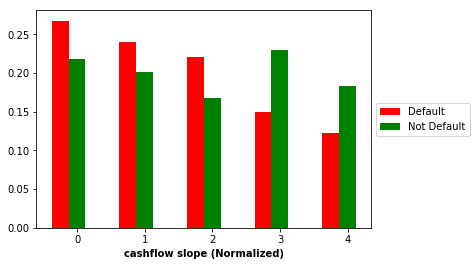

In [14]:
import ast
df['cashflow_slope'] = ''
df['cashflow_intercept'] = ''
df['active_cashflow_months'] = ''

# cashflow history
def loop(param):
    param = ast.literal_eval(param)
    if param is not None:
        for i in reversed(param):
            if i == 0:
                param.remove(i)
            elif i > 0:
                break
        return param
    else:
        return param
def length(p):
    try:
        if p is not None:
            return len(p)
        else:
            return 0
    except TypeError:
        pass
    
df['cashflow'] = df['cashflow_history'].apply(loop)
df['transaction'] = df['transaction_history'].apply(loop)
df = df[(df['cashflow'].apply(length) != 0) & (df['transaction'].apply(length) != 0)]

from scipy import stats
#get slope and intercept for each borrower's cashflow
def lingres (param, result):
    slope = stats.linregress(list(range(len(param),0,-1)), param).slope
    intercept = stats.linregress(list(range(len(param),0,-1)), param).intercept
    active = len(param)
    if result == 'slope':
        return slope
    elif result == 'intercept':
        return intercept
    elif result == 'active':
        return active

df['cashflow_slope'] = df.apply(lambda row: lingres(row['cashflow'], 'slope'), axis = 1)
df['cashflow_intercept'] = df.apply(lambda row: lingres(row['cashflow'], 'intercept'), axis = 1)
df['active_cashflow_months'] = df.apply(lambda row: lingres(row['cashflow'], 'active'), axis = 1)
    
# Cashflow Slope
def cashflowSlope(parameter):
    try:
        if parameter <= -1e5:
            parameter = '0'
        elif parameter <= 4e5:
            parameter = '1'
        elif parameter <= 1e6:
            parameter = '2'
        elif parameter <= 3e6:
            parameter = '3'
        else:
            parameter = '4'
    except TypeError:
        pass    
    return parameter

df['cashflow_slope_new'] = df['cashflow_slope'].apply(cashflowSlope)

tab = pd.crosstab(df['cashflow_slope_new'],df['default']).sort_values('cashflow_slope_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['cashflow_slope_new'],df['default'], normalize='columns').sort_values('cashflow_slope_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('cashflow slope', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['cashflow_slope_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('cashflow slope (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['cashflow_slope_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Category Info: 

Note: Negative Reputation is being calculated as the number of negative reputation over its total transaction (rate of negative reputation)

- Category 0 = If borrower have a trend of cashflow less than -100000 rupiah
- Category 1 = If borrower have a trend of cashflow less than 400000 rupiah
- Category 2 = If borrower have a trend of cashflow less than 1 million rupiah
- Category 3 = If borrower have a trend of cashflow less than 3 million rupiah
- Category 4 = If borrower have rate of negative reputation of more than 0.02

The graph shows that as the slope of the cashflow increases, borrowers will have lower tendency to default from their loans, as apparent from category 3 and 4 where the ratio of non-defaulters are lower than the ones that defaulted

In [15]:
from scipy import stats
import statistics

df['jump_rate'] = ''
df['down_rate'] = ''
df['stable_rate'] = ''
df['trans_down_rate'] = ''

def trend(cashflow, sigma, trend):
    
    period = len(cashflow)
    slope = stats.linregress(list(range(len(cashflow),0,-1)), cashflow).slope
    intercept = stats.linregress(list(range(len(cashflow),0,-1)), cashflow).intercept
    down = 0
    jump = 0
    stable = 0
    for i in cashflow: 
        linear = intercept + slope*period
        LCL = linear - sigma * (statistics.stdev(cashflow) / np.sqrt(len(cashflow)))
        UCL = linear + sigma * (statistics.stdev(cashflow) / np.sqrt(len(cashflow)))
        if i < LCL:
            down += 1
        elif i  > UCL:
            jump += 1
        else:
            stable += 1
        period -= 1
        
    jumprate = jump / len(cashflow)
    downrate = down / len(cashflow)
    stablerate = stable / len(cashflow)
    
    if trend == 'down':
        return downrate
    elif trend == 'jump':
        return jumprate
    elif trend == 'stable':
        return stablerate
    elif trend == 'data':
        return test
    

df['down_rate'] = df.apply(lambda row: trend(row['cashflow'], 2, 'down'), axis = 1)
df['stable_rate'] = df.apply(lambda row: trend(row['cashflow'], 2, 'stable'), axis = 1)
df['trans_down_rate'] = df.apply(lambda row: trend(row['cashflow'], 3, 'down'), axis = 1)

# Stable 
def cashflowStable(parameter):
    try:
        if parameter <= 0.7:
            parameter = '0'
        else:
            parameter = '1'
    except TypeError:
        pass    
    return parameter

df['stable_rate_new'] = df['stable_rate'].apply(cashflowStable)
# selected.append('stable_rate_new')
pd.crosstab(df['stable_rate_new'],df['default'], normalize='columns')

tab = pd.crosstab(df['stable_rate_new'],df['default']).sort_values('stable_rate_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['stable_rate_new'],df['default'], normalize='columns').sort_values('stable_rate_new', ascending=True).reset_index()

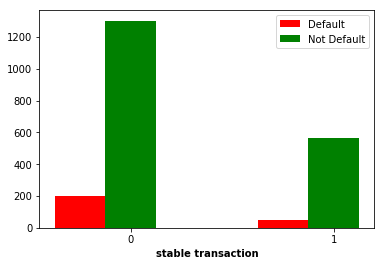

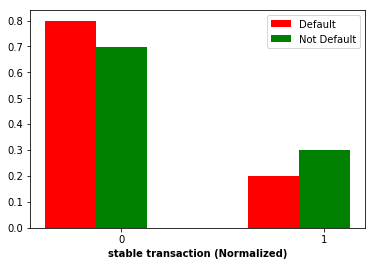

In [16]:
# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('stable transaction', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['stable_rate_new']))
plt.legend()
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('stable transaction (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['stable_rate_new']))
plt.legend()
plt.show()

Category Info:
- 0 signifies cashflow history where 70% of its fluctuation is considered as stable (does not break through a certain limit that has been set before)
- 1 signifies cashflow history where more than 30% of it fluctuation is not considered as stable

The graph shows that a stable cashflow of more than 70% is a safe indicator for determining that a borrower will not default their loan.

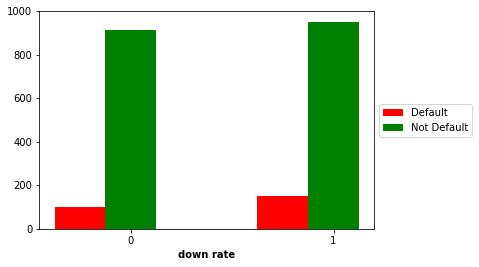

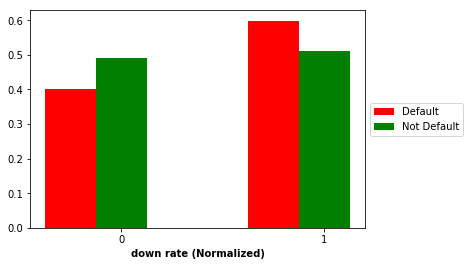

In [17]:
# down 
def cashflowDown(parameter):
    try:
        if parameter < 0.2:
            parameter = '0'
        else:
            parameter = '1'
    except TypeError:
        pass    
    return parameter

df['down_rate_new'] = df['down_rate'].apply(cashflowDown)
# selected.append('down_rate_new')
pd.crosstab(df['down_rate_new'],df['default'], normalize='columns')

tab = pd.crosstab(df['down_rate_new'],df['default']).sort_values('down_rate_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['down_rate_new'],df['default'], normalize='columns').sort_values('down_rate_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('down rate', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['down_rate_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('down rate (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['down_rate_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Category Info:
- 0 indicates that the cashflow has not suffered an out of limit decline on 20% of their whole cashflow from the 12-month period
- 1 indicates more than 20% of the cashflow has suffered an 'out-of-limit' decline.

The graph shows that a borrower that has a cashflow of category 1 has a higher tendency to default their loans.

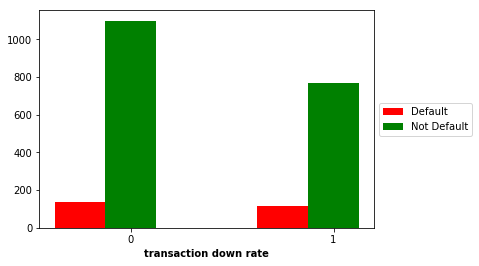

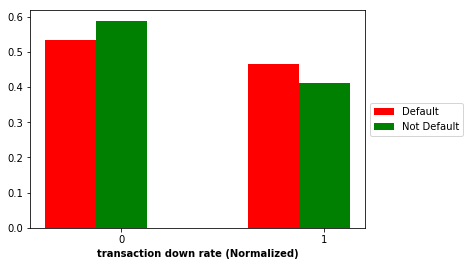

In [18]:
#transaction down 
def transDown(parameter):
    try:
        if parameter < 0.1:
            parameter = '0'
        else:
            parameter = '1'
    except TypeError:
        pass    
    return parameter

df['trans_down_rate_new'] = df['trans_down_rate'].apply(transDown)
# selected.append('trans_down_rate_new')
pd.crosstab(df['trans_down_rate_new'],df['default'], normalize='columns')

tab = pd.crosstab(df['trans_down_rate_new'],df['default']).sort_values('trans_down_rate_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['trans_down_rate_new'],df['default'], normalize='columns').sort_values('trans_down_rate_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('transaction down rate', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['trans_down_rate_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('transaction down rate (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['trans_down_rate_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Category Info:
- Category 0 indicates that 90% of transaction per month does not deviate from the control limit  
- Category 1 indicates that more than 10% of transaction per month deviate from the control limit  

The graph shows that category 1 has a higher rate of defaulters when compared to the non-defaulters. This shows that borrower of category 1 has more tendency to default their loans when compared to category 0

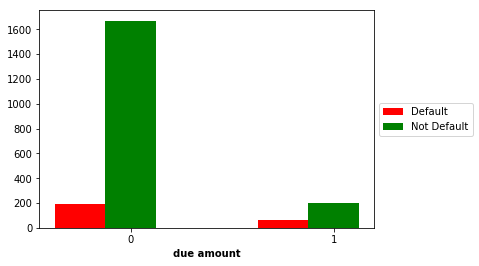

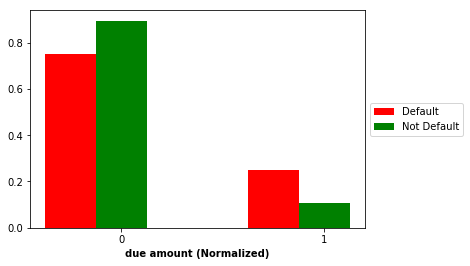

In [19]:
df['dueAmount'] = df['dueAmount'].fillna(0)
def dueAmount(parameter):
    try:
        if parameter <= 0:
            parameter = '0'
        else:
            parameter = '1'
    except TypeError:
        pass
    return parameter

df['dueAmount_new'] = df['dueAmount'].apply(dueAmount)

pd.crosstab(df['dueAmount_new'],df['default']).sort_values('dueAmount_new', ascending=True)
tab = pd.crosstab(df['dueAmount_new'],df['default']).sort_values('dueAmount_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['dueAmount_new'],df['default'], normalize='columns').sort_values('dueAmount_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('due amount', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['dueAmount_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('due amount (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['dueAmount_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Category Info: 
- Category 0: If borrowers do not have any remaining due amount needed to be paid
- Category 1: If borrowers do have some remaining due amount needed to be paid

The graph shows that borrowers of category 1 has a larger rate of defaulting in relative to its' non-defaulters, whereas borrowers of category 0 has lower rate.

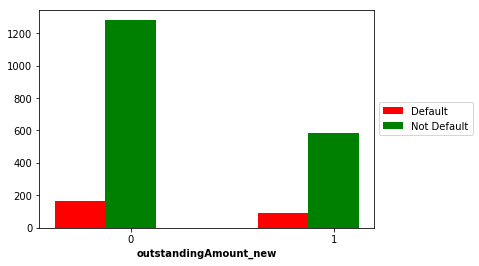

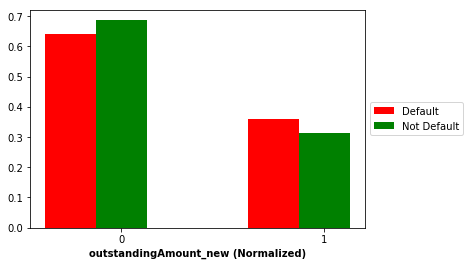

In [20]:
df['outstandingAmount'] = df['outstandingAmount'].fillna(0)
def outstandingAmount(parameter):
    try:
        if parameter <= 0:
            parameter = 0
        else:
            parameter = 1
    except TypeError:
        pass
    return parameter

df['outstandingAmount_new'] = df['outstandingAmount'].apply(outstandingAmount)

pd.crosstab(df['outstandingAmount_new'],df['default']).sort_values('outstandingAmount_new', ascending=True)
tab = pd.crosstab(df['outstandingAmount_new'],df['default']).sort_values('outstandingAmount_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['outstandingAmount_new'],df['default'], normalize='columns').sort_values('outstandingAmount_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('outstandingAmount_new', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['outstandingAmount_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('outstandingAmount_new (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['outstandingAmount_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Category Info: 
- Category 0: If borrowers do not have any remaining outstanding amount needed to be paid
- Category 1: If borrowers do have some remaining outstanding amount needed to be paid

The graph shows that borrowers of category 1 has a larger rate of defaulting in relative to its' non-defaulters, whereas borrowers of category 0 has lower rate.

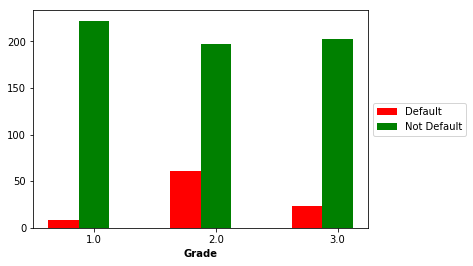

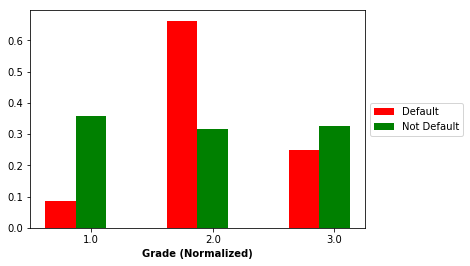

In [21]:
def categorizeGrade(param):
    try:
        if type(param) == str:
            if (list(param)[0] == 'B') or (list(param)[0] == 'C'):
                return 1
            elif (list(param)[0] == 'D') or (list(param)[0] == 'E'):
                return 2
            else:
                return 3
        else:
            return param
    
    except TypeError:
        pass

df['grade_new'] = df['grade'].apply(categorizeGrade)

pd.crosstab(df['grade_new'],df['default']).sort_values('grade_new', ascending=True)
tab = pd.crosstab(df['grade_new'],df['default']).sort_values('grade_new', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['grade_new'],df['default'], normalize='columns').sort_values('grade_new', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Grade', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['grade_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Grade (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['grade_new']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Category Info: 
- Category 1: Grade B or C from Perfindo
- Category 2: Grade D or E from Perfindo
- Category 3: Grade XX

The graph shows that borrowers of category 1 has a larger rate of defaulting in relative to its' non-defaulters, whereas borrowers of category 0 has lower rate.

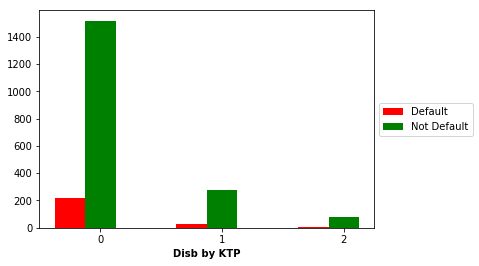

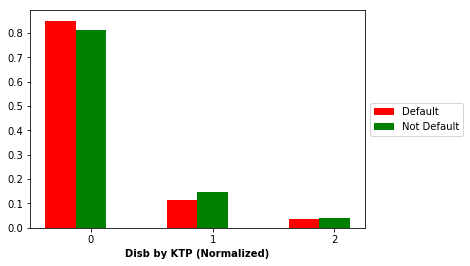

In [22]:
def nDisb(param):
    if param == 0:
        return 0
    elif param < 2:
        return 1
    else:
        return 2

df['nDisbKTP'] = df['nDisbKTP'].apply(nDisb)
tab = pd.crosstab(df['nDisbKTP'],df['default']).sort_values('nDisbKTP', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['nDisbKTP'],df['default'], normalize='columns').sort_values('nDisbKTP', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Disb by KTP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['nDisbKTP']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Disb by KTP (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['nDisbKTP']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

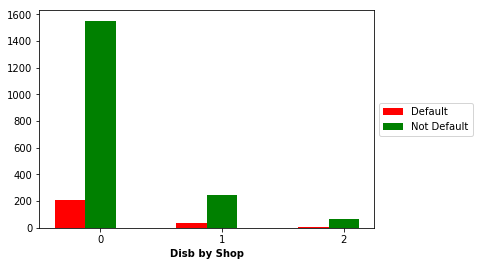

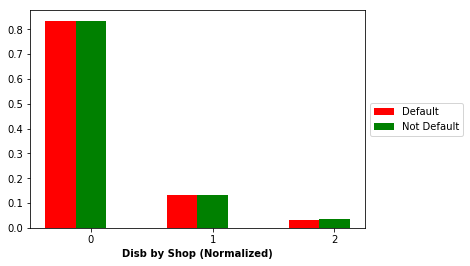

In [23]:
def nDisb(param):
    if param == 0:
        return 0
    if param < 2:
        return 1
    else:
        return 2

df['nDisbShop'] = df['nDisbShop'].apply(nDisb)
tab = pd.crosstab(df['nDisbShop'],df['default']).sort_values('nDisbShop', ascending=True).reset_index().reset_index()
tabNormed = pd.crosstab(df['nDisbShop'],df['default'], normalize='columns').sort_values('nDisbShop', ascending=True).reset_index()

# Plotting
import matplotlib.pyplot as plt
barWidth = 0.25

fig, ax = plt.subplots()
r1 = np.arange(len(tab[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tab[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tab[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Disb by Shop', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tab['nDisbShop']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots()
r1 = np.arange(len(tabNormed[1.0]))
r2 = [x + barWidth for x in r1]
p1 = ax.bar(r1, tabNormed[1.0], barWidth, color='r', label='Default')
p2 = ax.bar(r2, tabNormed[0.0], barWidth, color='g', label='Not Default')
plt.xlabel('Disb by Shop (Normalized)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tab[1.0]))], list(tabNormed['nDisbShop']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Category Info:
- Category 0: No past disbursement
- Category 1: 1 past disbursement
- Category 2: More than 1 past disbursement

The graph of past disbursement shows that more past disbursement will indicate how that borrower can be said to be more credible due to how the proportion of default decreases for each increments of disbursement by shops or KTP

In [24]:
selected = ['application_id','default','loan_amount_new','loan_duration_new','installment_new','complaint_count_new','store_age_month_new','other_income','reputation_negative_new','fraud_npwp','is_preapproved','bank_statement','ktp','merchant_type','cashflow_slope_new','stable_rate_new','down_rate_new','trans_down_rate_new','dueAmount_new','outstandingAmount_new','grade_new','nDisbKTP','nDisbShop']

In [25]:
path = cwd + '\\Dataset'

df[selected].drop('application_id', axis = 1).to_csv(path + '\getDatasetDataRobot.csv', index=False)
df[selected].to_csv(path + '\getModelPerformance.csv', index=False)